In [45]:
# ALex Imhoff's Assignment 1
## Below is my twitter API keys. Even if they are not all used in the code, I believe they should remain here for redundancy in security.
twitter_consumer_key="MmTr57fIMCqqIbxrwBEJ1yrSw"
twitter_consumer_secret="0rYT34IqWievBptSbUZhESCk8h9MCwftlPpKMVlmOnebrNORYI"
twitter_access_token="1570245645683810310-AbPsHhN1BUP0SEQvggUyvjwML2UeME"
twitter_access_secret="W9Cj8r16r7JEhzX7qflz3lMlGwtICMY8GwtJNILa3rlkQ"
twitter_bearer_token="AAAAAAAAAAAAAAAAAAAAALp2hAEAAAAAEOgoMm2LeQFGt0dyVgY8CJr8EcM%3Drf2kMVSYsT0BkeSVWZPpHqX9UqSa6efzyRNzgYWURuYE32hOGT"



## Below is my search query. My selection of the Dallas Cowboys' tweets comes from being a fan and a procrastinator (I was watching the game while working on this assignment.)
## This code is from Suhem Parack at https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9
###This is the article which professor Engler led me to in class.
import tweepy

client = tweepy.Client(bearer_token=twitter_bearer_token)
query = 'from:dallascowboys -is:retweet'
## Below is how I imported and edited my excel file. 
import csv
file_name = 'tweets.csv'

with open(file_name, 'a+') as filehandle:
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                                  tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(
            limit=1000):
        filehandle.write('%s,' % tweet.created_at)
        filehandle.write('%s,' % tweet.id)
        filehandle.write('%s\n' % tweet.context_annotations)
        
#### When ran, an error saying "Permission denied" may occur if excel is already open.


PermissionError: [Errno 13] Permission denied: 'tweets.csv'

In [23]:
##This code Allowed the notebook to read in the filled in csv from Excel. I was unable to read it in without including the "encoding" and "low _memory" parts,
## as I could not get the Excel file to save in the UTF-8 format.
## Code from CodeRush!!! in https://www.youtube.com/watch?v=yZLacoOiel4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("tweets.csv", encoding=('ISO-8859-1'), low_memory = False)

In [24]:
data.head()

,Date and time created,September date,ID,Context annotations,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226
0,2022-09-19 23:30:00+00:00,19,1.570000e+18,[{'domain': {'id': '3','name': 'TV Shows','description': 'Television shows from around ...,'entity': {'id': '10000612773','name': 'NFL Football','description': 'Replays of classic NFL games.'}},{'domain': {'id': '10',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-19 23:11:40+00:00,19,1.570000e+18,[{'domain': {'id': '3','name': 'TV Shows','description': 'Television shows from around ...,'entity': {'id': '10000612773','name': 'NFL Football','description': 'Replays of classic NFL games.'}},{'domain': {'id': '3',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-19 22:58:09+00:00,19,1.570000e+18,[{'domain': {'id': '3','name': 'TV Shows','description': 'Television shows from around ...,'entity': {'id': '10000612773','name': 'NFL Football','description': 'Replays of classic NFL games.'}},{'domain': {'id': '10',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-19 22:40:01+00:00,19,1.570000e+18,[{'domain': {'id': '3','name': 'TV Shows','description': 'Television shows from around ...,'entity': {'id': '10000612773','name': 'NFL Football','description': 'Replays of classic NFL games.'}},{'domain': {'id': '6',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-19 21:03:33+00:00,19,1.570000e+18,[{'domain': {'id': '3','name': 'TV Shows','description': 'Television shows from around ...,'entity': {'id': '10000612773','name': 'NFL Football','description': 'Replays of classic NFL games.'}},{'domain': {'id': '3',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Tweet Count by Day')

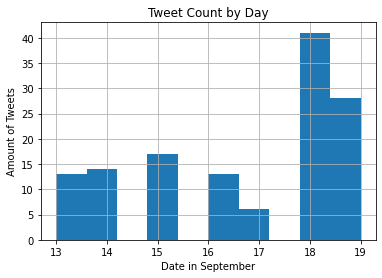

In [25]:
## MY end goal was to keep my data visualization simple, as the professor and I can attest that working between the Twitter API and this notebook was the hard part.
## I ended up simply counting how many Tweets the Dallas Cowboys made on each day in the last week. Code was learned from Data Summary and Visualization Examples.
data.hist('September date')
plt.ylabel('Amount of Tweets')
plt.xlabel('Date in September')
plt.title('Tweet Count by Day')